In [23]:
import pandas as pd
import numpy as np
import random as rd

from itertools import cycle
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from numpy.random import RandomState
import pylab as pl
import matplotlib.pyplot as plt
from sklearn import metrics

In [2]:
dataset = pd.read_csv("../Datasets/dermatology.tab", sep='\t',header=None).fillna("a")
#dataset = pd.read_csv("../Datasets/dermatology.tab", sep='\t',header=None, names=col_names)

In [3]:
dataset

,0,1,2,3,4,5,6,7,8,9,...,25,26,27,28,29,30,31,32,33,34
0,erythema,scaling,definite borders,itching,koebner phenomenon,polygonal papules,follicular papules,oral mucosal involvement,knee and elbow involvement,scalp involvement,...,disappearance of the granular layer,vacuolisation and damage of basal layer,spongiosis,saw-tooth appearance of retes,follicular horn plug,perifollicular parakeratosis,inflammatory monoluclear inflitrate,band-like infiltrate,age,type
1,c,c,c,c,c,c,c,c,c,c,...,c,c,c,c,c,c,c,c,c,d
2,a,a,a,a,a,a,a,a,a,a,...,a,a,a,a,a,a,a,a,a,class
3,2,2,0,3,0,0,0,0,1,0,...,0,0,3,0,0,0,1,0,55,seboreic dermatitis
4,3,3,3,2,1,0,0,0,1,1,...,0,0,0,0,0,0,1,0,8,psoriasis
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
364,2,1,1,0,1,0,0,0,0,0,...,0,0,1,0,0,0,2,0,25,pityriasis rosea
365,3,2,1,0,1,0,0,0,0,0,...,1,0,1,0,0,0,2,0,36,pityriasis rosea
366,3,2,2,2,3,2,0,2,0,0,...,0,3,0,3,0,0,2,3,28,lichen planus
367,2,1,3,1,2,3,0,2,0,0,...,0,2,0,1,0,0,2,3,50,lichen planus


In [4]:
X = dataset.iloc[3:,:-1].values

In [5]:
X

array([['2', '2', '0', ..., '1', '0', '55'],
       ['3', '3', '3', ..., '1', '0', '8'],
       ['2', '1', '2', ..., '2', '3', '26'],
       ...,
       ['3', '2', '2', ..., '2', '3', '28'],
       ['2', '1', '3', ..., '2', '3', '50'],
       ['3', '2', '2', ..., '3', '0', '35']], dtype=object)

In [6]:
y = dataset.iloc[3:,-1].values

In [7]:
#X_pd = pd.DataFrame(data=X)
# replace all instances of URC with 0 
#X_replace = X_pd.replace("?",0, regex=True)
# convert it back to numpy array
#X_np = X_replace.values
# set the object type as float
#X_fa = X_np.astype(float)

#X_pd
#X_pd[X_pd is '?'] = 0
#X_pd

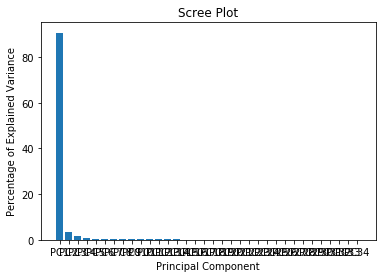

In [8]:
pca = PCA() # create a PCA object
pca.fit(X) # do the math
pca_data = pca.transform(X) # get PCA coordinates for scaled_data

per_var = np.round(pca.explained_variance_ratio_* 100, decimals=1)
labels = ['PC' + str(x) for x in range(1, len(per_var)+1)]
 
plt.bar(x=range(1,len(per_var)+1), height=per_var, tick_label=labels)
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Component')
plt.title('Scree Plot')
plt.show()

Text(0, 0.5, 'PC2 : 3.3%')

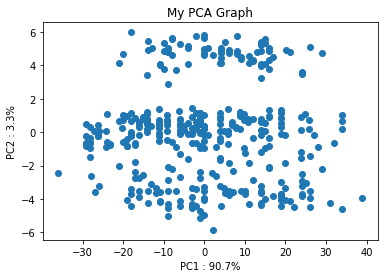

In [9]:
pca_df = pd.DataFrame(pca_data, columns=labels)

plt.scatter(pca_df.PC1, pca_df.PC2)
plt.title('My PCA Graph')
plt.xlabel('PC1 : {0}%'.format(per_var[0]))
plt.ylabel('PC2 : {0}%'.format(per_var[1]))

In [34]:
class clustering:
    
    def __init__(self):
        self.plot(X)

    def plot(self, X):
        compare = []*len(y)
        pca = PCA(n_components=2, whiten=True).fit(X)
        X_pca = pca.transform(X)
        kmeans = KMeans(n_clusters=6, random_state=RandomState(42)).fit(X_pca)
        
        labls = kmeans.labels_
        
        #for i in range(0,len(y)):
         #   if(y[i] is 'lichen planus'):
          #      print("yes")
           #     continue
            #else:
             #   print(labls[i],"+",y[i])

        for x in range(0,len(y)):
            if y[x] == 'seboreic dermatitis':
                compare.append(4)
            elif y[x] == 'psoriasis':
                compare.append(1)
            elif y[x] == 'lichen planus':
                compare.append(2)
            elif y[x] == 'cronic dermatitis':
                compare.append(5)
            elif y[x] == 'pityriasis rosea':
                compare.append(3)
            elif y[x] == 'pityriasis rubra pilaris':
                compare.append(0)
        #print(y)
        #print(compare)
        #d = {'original':compare,'predicted':labls}
        #df = pd.DataFrame(d)
        #print(df)
    
        print("")
        print("External Metrics:")
        print("The predicted values and the actual groups were matched against each other. The accuracy of the predicted values is ", metrics.adjusted_rand_score(compare, labls),"which is ", 
              "an accuracy rate of 70%")
        plot_2D(X_pca, kmeans.labels_, ["c0", "c1", "c2", "c3", "c4", "c5"])


External Metrics:
The predicted values and the actual groups were matched against each other. The accuracy of the predicted values is 0.7048410296978896 which is  an accuracy rate of 70%



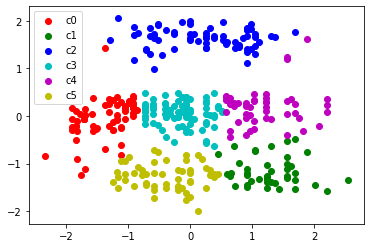

In [35]:
def plot_2D(data, target, target_names):
    colors = cycle('rgbcmykw')
    target_ids = range(len(target_names))
    pl.figure()
    for i, c, label in zip(target_ids, colors, target_names):
        pl.scatter(data[target == i, 0], data[target == i, 1],c=c, label=label)
    pl.legend()
    pl.show()

if __name__ == '__main__':
    c = clustering()

Internal Metrics: One cluster(c2) can be seen well seperated from the others. Other clusters can also be seen as seperated from one another, but not as much as the blue cluster. c3 and c4 appears to be flocked together. 

External Metrics: 